In [2]:
from pylab import *
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Polygon
import scipy.constants as cst
from astropy.io import ascii, fits
from scipy.signal.signaltools import wiener
from astropy.convolution import Gaussian1DKernel, convolve

fig_width_pt = 469.75499                # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width * golden_mean * 1.1   # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'pdf',
          'axes.linewidth': 1.5,
          'axes.spines.top': False,
          'axes.spines.right': False,
          'axes.labelsize': 16,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'lines.dash_joinstyle' : 'round',
          'lines.dash_capstyle' : 'round',
          'lines.solid_joinstyle' : 'round',
          'lines.solid_capstyle' : 'round',
          'text.usetex': False,
          'mathtext.fontset' : 'stixsans',
          'mathtext.default' : 'rm',
          'xtick.direction' : 'in',
          'ytick.direction' : 'in',
          'xtick.top' : False,
          'ytick.right' : False,
          'figure.figsize': fig_size}
rcParams.update(params)

In [3]:
import numpy as np
import pandas as pd

In [4]:
rootdir = "/Users/thepoetoftwilight/Documents/SDSS/Code/"

In [5]:
df = pd.read_csv(rootdir + "dr13.csv")

In [6]:
df.columns

Index(['bestobjid', 'mjd', 'z', 'oiii_4959_flux', 'oiii_5007_flux',
       'h_beta_flux', 'nii_6548_flux', 'nii_6584_flux', 'h_alpha_flux'],
      dtype='object')

In [7]:
x = np.log10(df['nii_6584_flux']/df['h_alpha_flux'])
y = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
idx = (x>-2)&(x<1)&(y>-1.2)&(y<1.5)

In [9]:
x = x[idx]
y = y[idx]

In [10]:
from matplotlib.colors import LogNorm

In [11]:
import seaborn as sns

Text(0, 0.5, 'log10(F([O_III] 5007)/F(H_beta))')

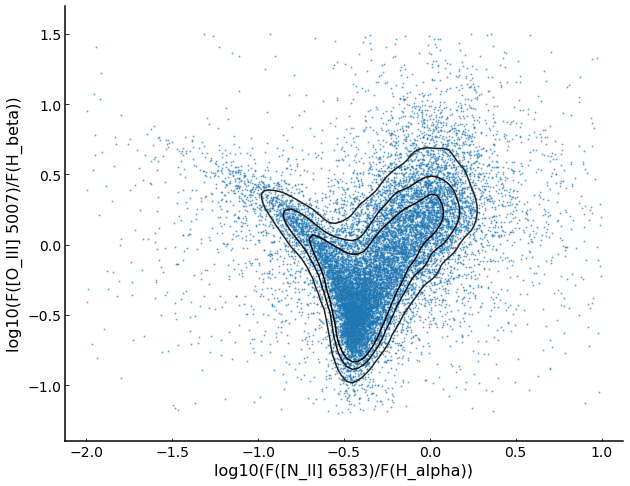

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 8))

ax.scatter(x, y, s=1, alpha=.5)
sns.kdeplot(x, y, levels=[.25, .5, .75], color='black')

ax.set_xlabel(r'log10(F([N_II] 6583)/F(H_alpha))')
ax.set_ylabel(r'log10(F([O_III] 5007)/F(H_beta))')

In [135]:
# calculate the 2D density of the data given
h2,xbins,ybins=np.histogram2d(x,y,bins=25)

In [136]:
h2

array([[  0.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   1.,   2.,   0.,   1.,   2.,   1.,   1.,   1.,   1.,
          1.,   0.,   1.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   0.,
          2.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,
          1.,   1.,   1.,   1.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   0.,   1.,   3.,   2.,   2.,   3.,
          3.,   1.,   1.,   1.,   3.,   6.,   5.,   7.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  3.,   0.,   0.,   0.,   1.,   0.,   2.,   3.,   1.,   3.,   4.,
          4.,   2.,   4.,   2.,   2.,   4.,   8.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  1.,   0.,   1.,   0.,   3.,   2.,   3.,   3.,   2.,   4.,   1.,
          5.,   3.,   4.,   6.,   7.,   5.,   9.,  

In [139]:
np.sort(np.ravel(h2))[-1]

589.0

In [111]:
counts.shape, xbins.shape, ybins.shape

((25, 25), (26,), (26,))

In [112]:
#counts/=np.sum(counts)

In [117]:
counts.max(), counts.min(), np.sum(counts)

(589.0, 0.0, 16288.0)

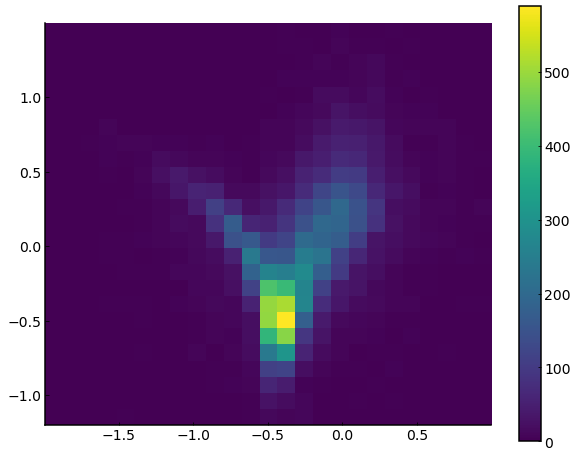

In [115]:
fig, ax = plt.subplots(1, figsize = (10, 8))
im = ax.imshow(counts.transpose(), extent=[x.min(),x.max(),y.min(),y.max()], origin='lower')
cbar = fig.colorbar(im)

[  0.  80. 160. 240. 320. 400. 480. 560. 640.]


Text(0, 0.5, 'log10(F([O_III] 5007)/F(H_beta))')

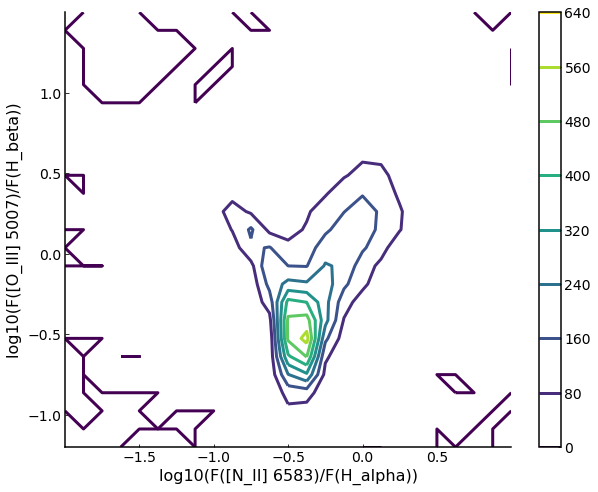

In [104]:
fig, ax = plt.subplots(1, figsize=(10, 8))



#ax.scatter(x, y, s=1, alpha=.5)
contour = ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
   ybins.min(),ybins.max()],linewidths=3,
   linestyles='solid')

cbar = fig.colorbar(contour)

print(contour.levels)

ax.set_xlabel(r'log10(F([N_II] 6583)/F(H_alpha))')
ax.set_ylabel(r'log10(F([O_III] 5007)/F(H_beta))')

In [81]:
df = pd.DataFrame({'x': x, 'y': y})

In [82]:
df.to_csv('scatter.csv', index=False)